# **Pengenalan Digit Tulisan Tangan Dengan Metode Backpropagation**


---

In [149]:
import tensorflow as tf #library mechine-learning
import matplotlib.pyplot as plt #untuk visualisasi data

## Deskripsi dataset
*   Data yang digunakan berasal MNIST database (Modified National Institute of Standards and Technology database) yang berisikan 60.000 data training dan 10.000 data testing.
*   Data berupa citra digit tunggal angka 0 sampai 9 dalam format grayscale berdimensi 28 x 28 pixel.
*   x_train dan x_test diisi dengan array dari data citra, sedangkan y_train dan y_test diisi dengan angka label dari citra yang bersangkutan.



In [150]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## Contoh citra dari dataset
menampilkan citra dari data pertama, untuk memastikan hasil dari import dataset berhasil.

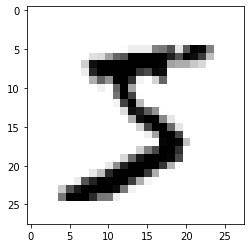

Citra digit angka 5


In [151]:
plt.imshow(x_train[0], cmap="binary") 
plt.show() 
print("Citra digit angka",y_train[0])

## Normalisasi data
* Nilai input dari citra yang sudah diimport pada tahan sebelumnya berupa integer 0 - 255 dinormalisasi terlebih dahulu menjadi angka 0 - 1.
* Nilai target output yang berupa nilai integer 0 - 9 kita ubah menjadi one-hot encoded, yaitu vektor yang berisi angka 0 dan 1


In [152]:
# konversi integers jadi floats
train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')
# normalisasi ke range 0-1
x_train = train_norm / 255.0
x_test = test_norm / 255.0
# one hot encode nilai target
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

## Mendefinisikan Model Neural Network


In [153]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, input_shape=(784,), activation=tf.nn.relu, kernel_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer="glorot_uniform"))

### Konfigurasi training
* Fungsi loss yang digunakan adalah categorical crossentropy<br>
sesuai dengan klasifikasi multi class dengan output berupa one-hot encoded

In [154]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Proses pembelajaran 
Menjalankan proses pembelajaran (mencari loss minimun dan update bobot) dari model yang telah didefinisikan di atas.<br>
Proses ini dijalankan berulang kali sebanyak jumlah epoch yang telah ditentukan

In [155]:
history = model.fit(x=x_train, y=y_train_enc, epochs=10, validation_split=0.1) 

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.9167 - val_loss: 0.1100 - val_accuracy: 0.9658
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1275 - accuracy: 0.9610 - val_loss: 0.0769 - val_accuracy: 0.9760
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0928 - accuracy: 0.9709 - val_loss: 0.0789 - val_accuracy: 0.9782
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0764 - accuracy: 0.9753 - val_loss: 0.0683 - val_accuracy: 0.9802
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0644 - accuracy: 0.9794 - val_loss: 0.0890 - val_accuracy: 0.9772
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0583 - accuracy: 0.9809 - val_loss: 0.0766 - val_accuracy: 0.9793
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0489 - accuracy: 0.9835 - val_loss: 0.0736 - val_accuracy:

## Evaluasi model NN


In [156]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test_enc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9800


## Pengujian dengan data testing
Setelah model selesai melakukan traning dan hasil dari model dapat dilihat dari evaluasi diatas, maka model siap dilakukan testing

In [157]:
predictions = model.predict(x_test) 

## Menampilkan contoh hasil pengenalan citra
Berikut ini tampilan dari sebagian hasil testing data.

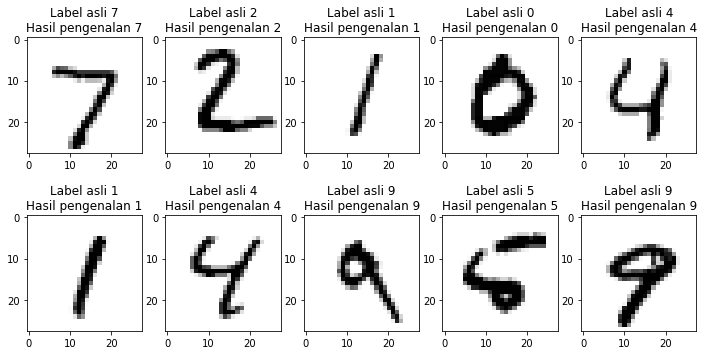

In [158]:
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Label asli {y_test[i]}\nHasil pengenalan {predictions[i].argmax()}")

## Visualisasi hasil training


1.   Akurasi training



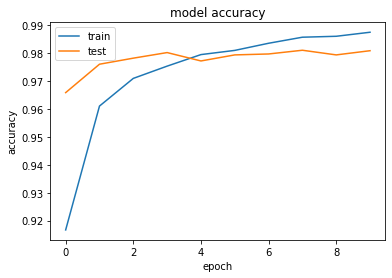

In [159]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



2.   Loss training



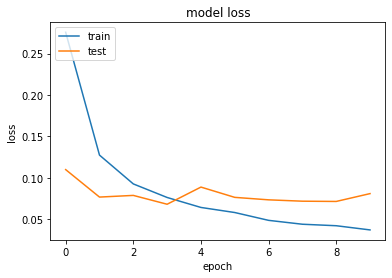

In [160]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()